#CHALLENGE 7: Neuronas Biológicas El perceptrón Multi Layer Perceptron (MLP) y Backpropagation

**Estudiante: Daniel Ivan Zavaleta Guzmán**

In [ ]:
!nvidia-smi

Sun May 26 03:28:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

##Introducción

En este challenge, al buscar bases de datos libres dentro de Physionet, se encontró la base de datos "Heart and lung segmentations for MIMIC-CXR/MIMIC-CXR-JPG and Montgomery County TB databases", la cual proporciona segmentaciones manuales de corazones y pulmones para imágenes de rayos X de pecho de las bases de datos MIMIC-CXR/MIMIC-CXR-JPG y Montgomery County tuberculosis (TB) [1].

No obstante, aunque esta base de datos de Physionet proporciona segmentaciones del corazón para las 138 radiografías de tórax posteriores-anteriores de la Montgomery County TB database, este challenge no empleará las segmentaciones cardíacas de esta base de datos de Physionet. En cambio, se centrará exclusivamente en las imágenes de rayos X completas del Montgomery County TB database para realizar clasificaciones de ausencia o presencia de tuberculosis en base a radiografías de tórax [2].

La información del Montgomery County TB database se puede encontrar en: https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/index.html .


Referencias:

1. Duvieusart, B., Krones, F., Parsons, G., Tarassenko, L., Papiez, B. W., & Mahdi, A. (2023). Heart and lung segmentations for MIMIC-CXR/MIMIC-CXR-JPG and Montgomery County TB databases (version 1.0.0). PhysioNet. https://doi.org/10.13026/0k35-mb65.

2. Montgomery County X-ray Set, Link:
https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-rayDatasets/Montgomery-County-CXR-Set/MontgomerySet/index.html

##Importación de librerias

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##Obtención de base de datos de physionet

In [ ]:
#!wget -r -N -c -np https://physionet.org/files/chexmask-cxr-segmentation-data/0.4/ # todo dataset
#!wget -r -N -c -np https://physionet.org/content/chexmask-cxr-segmentation-data/0.4/OriginalResolution/ChestX-Ray8.csv

#obtencion de imagenes:
!wget -r -N -c -np https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png/index.html

--2024-05-26 15:20:07--  https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png/index.html
Resolving data.lhncbc.nlm.nih.gov (data.lhncbc.nlm.nih.gov)... 18.238.109.83, 18.238.109.111, 18.238.109.56, ...
Connecting to data.lhncbc.nlm.nih.gov (data.lhncbc.nlm.nih.gov)|18.238.109.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23032 (22K) [text/html]
Saving to: ‘data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png/index.html’

data.lhncbc.nlm.nih 100%[===================>]  22.49K  --.-KB/s    in 0.05s   

2024-05-26 15:20:07 (471 KB/s) - ‘data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png/index.html’ saved [23032/23032]

Loading robots.txt; please ignore errors.
--2024-05-26 15:20:07--  https://data.lhncbc.nlm.nih.gov/robots.txt
Reusing existing connection to data.lhncbc.nl

In [ ]:
#obtencion de descripcion de cada imagen:
!wget -r -N -c -np https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings/index.html

--2024-05-26 15:22:43--  https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings/index.html
Resolving data.lhncbc.nlm.nih.gov (data.lhncbc.nlm.nih.gov)... 18.164.154.67, 18.164.154.86, 18.164.154.114, ...
Connecting to data.lhncbc.nlm.nih.gov (data.lhncbc.nlm.nih.gov)|18.164.154.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22396 (22K) [text/html]
Saving to: ‘data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings/index.html’

data.lhncbc.nlm.nih 100%[===================>]  21.87K  --.-KB/s    in 0.05s   

2024-05-26 15:22:44 (482 KB/s) - ‘data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings/index.html’ saved [22396/22396]

Loading robots.txt; please ignore errors.
--2024-05-26 15:22:44--  https://data.lhncbc.nlm.nih.gov/robots.txt
Reusing existing c

##Análisis exploratorio de datos

Se verifica la informacion dentro de un archivo .txt

In [ ]:
#path del archivo específico
file_path = '/content/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings/MCUCXR_0001_0.txt'

# Verificar si el archivo existe
if os.path.exists(file_path):
    with open(file_path, 'r') as file:
        # Leer las líneas del archivo
        lines = file.readlines()
lines

["Patient's Sex: F \n", "Patient's Age: 027Y\n", 'normal\n']

Se observa que en los archivos .txt se encuentra información relacionada a cada imagen, correspondiente a género, edad, y descripción (normal o TB).

Se extrae en un dataframe la informacion de cada archivo .txt

In [ ]:
# Ruta a la carpeta con los archivos .txt
folder_path = "/content/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings"

# Lista para almacenar los datos
data = []

# Recorrer los archivos en el directorio
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        # Construir el camino completo al archivo
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            # Leer las líneas del archivo
            lines = file.readlines()

            # Extraer la información
            gender = lines[0].strip().split(': ')[1]
            age = lines[1].strip().split(': ')[1]
            findings = lines[2].strip()

            # Extraer el ID del estudio del nombre del archivo
            study_id = filename.split('.')[0]

            # Añadir la información a la lista
            data.append({'study_id': study_id, 'age': age, 'gender': gender, 'findings': findings})

# Crear DataFrame
montgomery_metadata = pd.DataFrame(data)

# Mostrar el DataFrame
montgomery_metadata


,study_id,age,gender,findings
0,MCUCXR_0024_0,037Y,F,normal
1,MCUCXR_0015_0,048Y,M,normal
2,MCUCXR_0362_1,061Y,M,rt pleural effusion with some nodular infiltra...
3,MCUCXR_0096_0,043Y,F,normal
4,MCUCXR_0031_0,053Y,M,normal
...,...,...,...,...
133,MCUCXR_0077_0,008Y,F,normal
134,MCUCXR_0016_0,052Y,F,normal
135,MCUCXR_0049_0,028Y,F,normal
136,MCUCXR_0035_0,020Y,F,normal


Se verifica que no hay datos nulos.

In [ ]:
montgomery_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   study_id  138 non-null    object
 1   age       138 non-null    object
 2   gender    138 non-null    object
 3   findings  138 non-null    object
dtypes: object(4)
memory usage: 4.4+ KB


Según la información de la BD, son 58 casos con tuberculosis, y 80 casos normales. Se procede a verificar esto.

In [ ]:
# Contar las filas donde 'findings' es 'normal'
normal_count = montgomery_metadata[montgomery_metadata['findings'] == 'normal'].shape[0]

print(f"Nro de observaciones 'normal': {normal_count}")


Nro de observaciones 'normal': 80


Entonces, las descripciones de las filas donde no se tiene el término "normal", se cambian por "TB", las cuales demuestran casos con tuberculosis, mientras que el término "normal" se mantiene, ya que reflejan la ausencia de tuberculosis.

In [ ]:
# Cambiar los términos en la columna 'findings'
montgomery_metadata['findings'] = montgomery_metadata['findings'].apply(lambda x: "TB" if x != 'normal' else "normal")

# Mostrar los primeros registros para verificar los cambios
montgomery_metadata.head(10)


,study_id,age,gender,findings
0,MCUCXR_0024_0,037Y,F,normal
1,MCUCXR_0015_0,048Y,M,normal
2,MCUCXR_0362_1,061Y,M,TB
3,MCUCXR_0096_0,043Y,F,normal
4,MCUCXR_0031_0,053Y,M,normal
5,MCUCXR_0218_1,046Y,F,TB
6,MCUCXR_0002_0,040Y,F,normal
7,MCUCXR_0101_0,017Y,F,normal
8,MCUCXR_0251_1,077Y,F,TB
9,MCUCXR_0004_0,011Y,F,normal


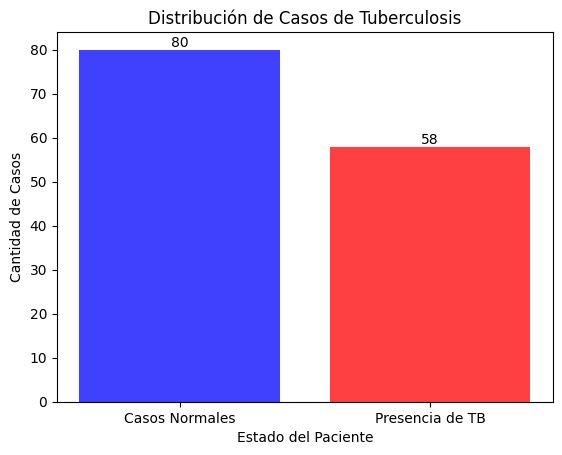

In [ ]:
# Contar la cantidad de casos normales y con TB usando condiciones
count_0s = len(montgomery_metadata[montgomery_metadata['findings'] == "normal"])
count_1s = len(montgomery_metadata[montgomery_metadata['findings'] == "TB"])

# Preparar los datos para el gráfico
labels = ['Casos Normales', 'Presencia de TB']
counts = [count_0s, count_1s]

# Crear el histograma
bars = plt.bar(labels, counts, color=['blue', 'red'], alpha=0.75)

# Agregar título y etiquetas
plt.title('Distribución de Casos de Tuberculosis')
plt.xlabel('Estado del Paciente')
plt.ylabel('Cantidad de Casos')

# Añadir anotaciones con la cantidad exacta sobre cada barra
for bar, count in zip(bars, counts):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{count}', va='bottom', ha='center')

# Mostrar el gráfico
plt.show()

Se verifica las dimensiones de cada imagen del dataset.

In [ ]:
# Ruta del directorio con las imágenes
image_folder = '/content/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png'

# Función para obtener las dimensiones de las imágenes
def get_image_dimensions(image_folder):
    dimensions = []
    for filename in os.listdir(image_folder):
        if filename.endswith('.png'):  # Asegurarse de procesar solo archivos PNG
            image_path = os.path.join(image_folder, filename)
            with Image.open(image_path) as img:
                width, height = img.size
                dimensions.append((filename, width, height))
    return dimensions

# Obtener dimensiones
image_dimensions = get_image_dimensions(image_folder)

# Mostrar las dimensiones de cada imagen
for item in image_dimensions:
    print(f"Archivo: {item[0]}, Ancho: {item[1]}, Alto: {item[2]}")


Archivo: MCUCXR_0081_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0316_1.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0044_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0062_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0294_1.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0058_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0052_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0083_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0016_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0309_1.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0094_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0041_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0023_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0348_1.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0053_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0097_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0253_1.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0387_1.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0029_0.png, Ancho: 4020, Alto: 4892
Archivo: MCU

##Preprocesamiento de datos

Se interrelaciona las imágenes con las etiquetas almacenadas en el dataframe

In [ ]:
#se crea nueva columna en 'montgomery_metadata` tiene las columnas 'study_id' para el nombre del archivo y 'findings' para las etiquetas
montgomery_metadata['filename'] = montgomery_metadata['study_id'].apply(lambda x: f"{x}.png")
montgomery_metadata.head(5)

,study_id,age,gender,findings,filename
0,MCUCXR_0024_0,037Y,F,normal,MCUCXR_0024_0.png
1,MCUCXR_0015_0,048Y,M,normal,MCUCXR_0015_0.png
2,MCUCXR_0362_1,061Y,M,TB,MCUCXR_0362_1.png
3,MCUCXR_0096_0,043Y,F,normal,MCUCXR_0096_0.png
4,MCUCXR_0031_0,053Y,M,normal,MCUCXR_0031_0.png


Se configura el generador de imágenes para el preprocesamiento y la división en conjuntos de entrenamiento y validación.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # División del 20% para validación
)

Se crean generadores de datos

In [ ]:
train_generator = datagen.flow_from_dataframe(
    dataframe=montgomery_metadata,
    directory='/content/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png',  # Ajusta según la ruta correcta
    x_col='filename',  # columna que contiene los nombres de archivo
    y_col='findings',  # columna que contiene las etiquetas
    target_size=(256, 256),  # Redimensionamiento de las imágenes
    batch_size=10,
    class_mode='binary',
    subset='training'  # Subconjunto para entrenamiento
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=montgomery_metadata,
    directory='/content/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png',  # Ajusta según la ruta correcta
    x_col='filename',
    y_col='findings',
    target_size=(256, 256),
    batch_size=10,
    class_mode='binary',
    subset='validation'  # Subconjunto para validación
)


Found 111 validated image filenames belonging to 2 classes.
Found 27 validated image filenames belonging to 2 classes.


In [ ]:
# Verificar el número de muestras y ajustar 'steps_per_epoch'
print(f"Entrenamiento: {train_generator.samples}")
print(f"Validación: {validation_generator.samples}")

# Asegúrate de que 'steps_per_epoch' y 'validation_steps' no sean 0
steps_per_epoch = max(1, train_generator.samples // train_generator.batch_size)
validation_steps = max(1, validation_generator.samples // validation_generator.batch_size)

Entrenamiento: 111
Validación: 27


In [ ]:
steps_per_epoch

11

In [ ]:
validation_steps

2

##Entrenamiento de modelo de DL

**Modelo sin regularización ni dropout**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Construcción del modelo
model1 = Sequential([
    Flatten(input_shape=(256, 256, 3)),  # Aplanar la entrada de imágenes de 256x256 con 3 canales de color
    Dense(128, activation='relu'),       # Primera capa oculta
    Dense(64, activation='relu'),        # Segunda capa oculta
    Dense(32, activation='relu'),        # Tercera capa oculta
    Dense(1, activation='sigmoid')       # Capa de salida
])

# Resumen del modelo
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               25165952  
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 25176321 (96.04 MB)
Trainable params: 25176321 (96.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilar el modelo
model1.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
modelb1 = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)

Epoch 1/20
11/11 [==============================] - 56s 5s/step - loss: 15.2509 - accuracy: 0.4554 - val_loss: 4.3745 - val_accuracy: 0.5500
Epoch 2/20
11/11 [==============================] - 47s 4s/step - loss: 4.3307 - accuracy: 0.5842 - val_loss: 1.8413 - val_accuracy: 0.5500
Epoch 3/20
11/11 [==============================] - 48s 4s/step - loss: 3.6454 - accuracy: 0.5347 - val_loss: 5.3652 - val_accuracy: 0.5000
Epoch 4/20
11/11 [==============================] - 48s 4s/step - loss: 3.5921 - accuracy: 0.5941 - val_loss: 8.3977 - val_accuracy: 0.5000
Epoch 5/20
11/11 [==============================] - 48s 4s/step - loss: 3.0719 - accuracy: 0.5644 - val_loss: 7.7241 - val_accuracy: 0.5000
Epoch 6/20
11/11 [==============================] - 47s 4s/step - loss: 6.3426 - accuracy: 0.5644 - val_loss: 1.8479 - val_accuracy: 0.5000
Epoch 7/20
11/11 [==============================] - 47s 4s/step - loss: 2.0447 - accuracy: 0.5248 - val_loss: 1.2083 - val_accuracy: 0.6000
Epoch 8/20
11/11 [=

##Evaluación de resultados (sin regularización ni dropout)

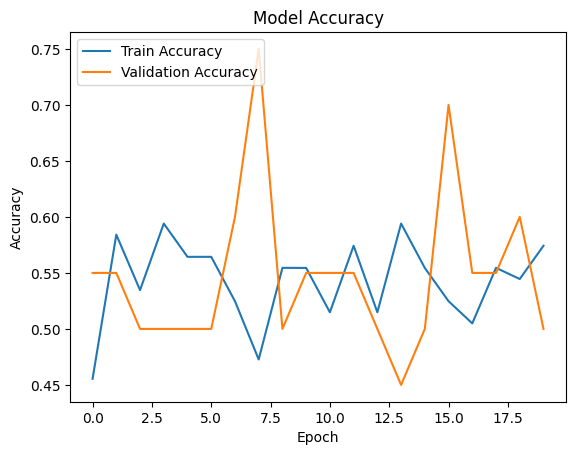

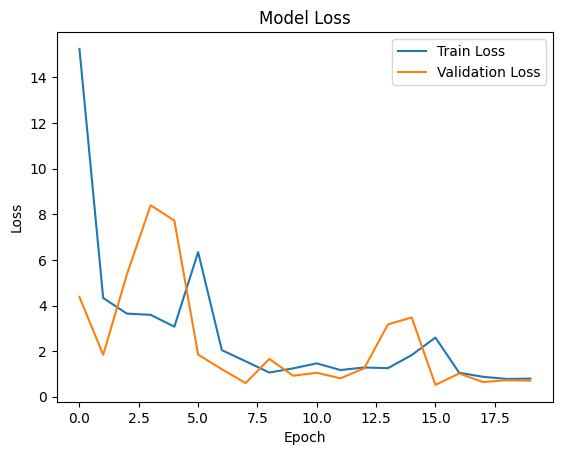

In [ ]:
# Gráficas de precisión
plt.plot(modelb1.history['accuracy'], label='Train Accuracy')
plt.plot(modelb1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Gráficas de pérdida
plt.plot(modelb1.history['loss'], label='Train Loss')
plt.plot(modelb1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


##Entrenamiento de modelo de DL (usando solo dropout)

Construcción de red neuronal

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Construcción del modelo
model = Sequential([
    Flatten(input_shape=(256, 256, 3)),  # Aplanar la entrada de imágenes de 256x256 con 3 canales de color
    Dense(128, activation='relu'),       # Primera capa oculta
    Dense(64, activation='relu'),        # Segunda capa oculta
    Dense(64, activation='relu'),        # Tercera capa oculta
    Dropout(0.5),                        # Dropout para reducir overfitting
    Dense(32, activation='relu'),        # Cuarta capa oculta
    Dense(1, activation='sigmoid')       # Capa de salida
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_5 (Dense)             (None, 128)               25165952  
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                

Entrenamiento del modelo de DL

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20  # Mínimo 20 épocas
)


Epoch 1/20
11/11 [==============================] - 78s 7s/step - loss: 16.8771 - accuracy: 0.5446 - val_loss: 12.7789 - val_accuracy: 0.4500
Epoch 2/20
11/11 [==============================] - 46s 4s/step - loss: 16.2616 - accuracy: 0.4455 - val_loss: 2.0227 - val_accuracy: 0.6000
Epoch 3/20
11/11 [==============================] - 47s 4s/step - loss: 8.8659 - accuracy: 0.4851 - val_loss: 6.7762 - val_accuracy: 0.4500
Epoch 4/20
11/11 [==============================] - 46s 4s/step - loss: 5.0942 - accuracy: 0.5941 - val_loss: 7.8549 - val_accuracy: 0.5500
Epoch 5/20
11/11 [==============================] - 50s 5s/step - loss: 7.6322 - accuracy: 0.4752 - val_loss: 5.6432 - val_accuracy: 0.5000
Epoch 6/20
11/11 [==============================] - 54s 5s/step - loss: 6.3627 - accuracy: 0.5149 - val_loss: 1.5275 - val_accuracy: 0.5500
Epoch 7/20
11/11 [==============================] - 47s 4s/step - loss: 4.0539 - accuracy: 0.5149 - val_loss: 2.2352 - val_accuracy: 0.5500
Epoch 8/20
11/11 

##Evaluación de resultados (usando solo dropout)

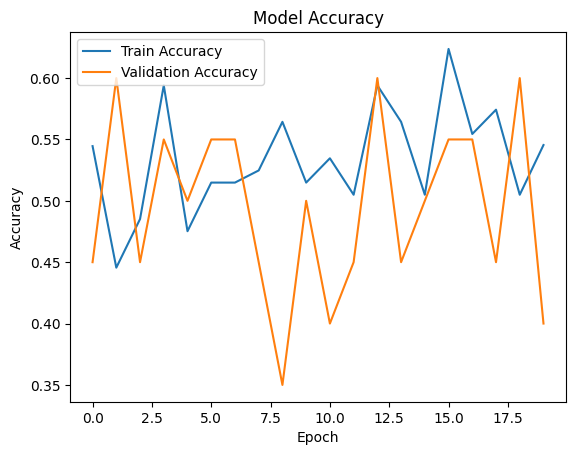

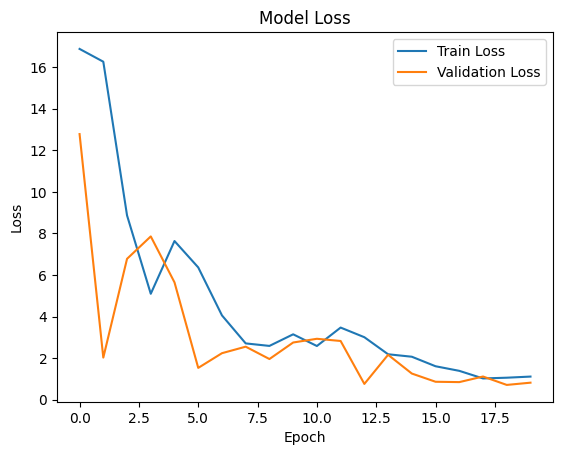

In [ ]:
import matplotlib.pyplot as plt

# Gráficas de precisión
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Gráficas de pérdida
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


##Entrenamiento del modelo de DL (usando regularización y dropout)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Definir el modelo
model3 = Sequential([
    Flatten(input_shape=(256, 256, 3)),  # Aplanar las imágenes de entrada

    # Primera capa oculta
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),

    # Segunda capa oculta
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),

    # Tercera capa oculta
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),

    # Capa de salida
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
modelb3 = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)

Epoch 1/20
11/11 [==============================] - 45s 4s/step - loss: 91.9767 - accuracy: 0.4554 - val_loss: 42.0325 - val_accuracy: 0.7500
Epoch 2/20
11/11 [==============================] - 37s 3s/step - loss: 136.0896 - accuracy: 0.4752 - val_loss: 23.9924 - val_accuracy: 0.3000
Epoch 3/20
11/11 [==============================] - 37s 4s/step - loss: 125.6591 - accuracy: 0.4356 - val_loss: 10.2292 - val_accuracy: 0.7000
Epoch 4/20
11/11 [==============================] - 37s 3s/step - loss: 126.1196 - accuracy: 0.5149 - val_loss: 34.2336 - val_accuracy: 0.7500
Epoch 5/20
11/11 [==============================] - 40s 4s/step - loss: 78.3950 - accuracy: 0.4653 - val_loss: 38.0659 - val_accuracy: 0.2500
Epoch 6/20
11/11 [==============================] - 38s 3s/step - loss: 83.9118 - accuracy: 0.4158 - val_loss: 30.9630 - val_accuracy: 0.7000
Epoch 7/20
11/11 [==============================] - 37s 3s/step - loss: 45.5958 - accuracy: 0.4851 - val_loss: 11.0852 - val_accuracy: 0.4500
Epo

##Evaluación de resultados (usando regularización y dropout)

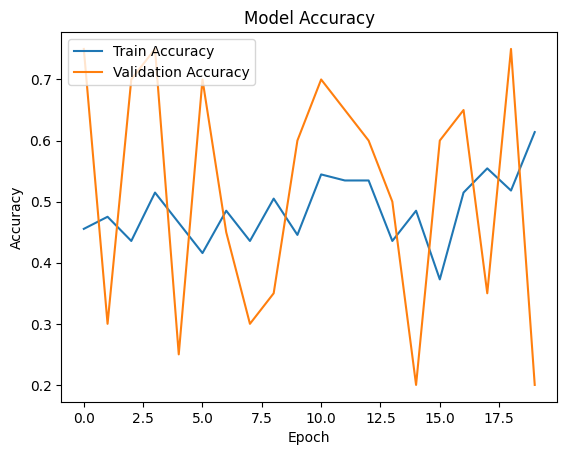

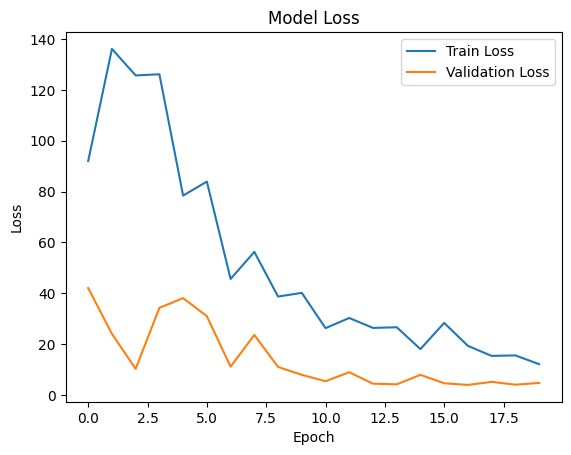

In [ ]:
import matplotlib.pyplot as plt

# Gráficas de precisión
plt.plot(modelb3.history['accuracy'], label='Train Accuracy')
plt.plot(modelb3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Gráficas de pérdida
plt.plot(modelb3.history['loss'], label='Train Loss')
plt.plot(modelb3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

##Entrenamiento (usando regularización y dropout) 2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

model4 = Sequential([
    Flatten(input_shape=(256, 256, 3)),  # Aplanar las imágenes de entrada

    # Primera capa oculta
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),

    # Segunda capa oculta
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),

    # Tercera capa oculta
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),

    # Capa de salida
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
modelb4 = model4.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)

Epoch 1/20
11/11 [==============================] - 44s 3s/step - loss: 81.8349 - accuracy: 0.5149 - val_loss: 40.0897 - val_accuracy: 0.6000
Epoch 2/20
11/11 [==============================] - 40s 4s/step - loss: 162.0801 - accuracy: 0.4653 - val_loss: 94.5151 - val_accuracy: 0.6500
Epoch 3/20
11/11 [==============================] - 36s 3s/step - loss: 146.9353 - accuracy: 0.5248 - val_loss: 36.0507 - val_accuracy: 0.7000
Epoch 4/20
11/11 [==============================] - 36s 4s/step - loss: 133.6921 - accuracy: 0.6040 - val_loss: 41.4993 - val_accuracy: 0.3000
Epoch 5/20
11/11 [==============================] - 38s 4s/step - loss: 133.2150 - accuracy: 0.4554 - val_loss: 37.9476 - val_accuracy: 0.8000
Epoch 6/20
11/11 [==============================] - 40s 4s/step - loss: 118.6128 - accuracy: 0.4851 - val_loss: 25.5959 - val_accuracy: 0.7000
Epoch 7/20
11/11 [==============================] - 38s 3s/step - loss: 87.7221 - accuracy: 0.4653 - val_loss: 31.5915 - val_accuracy: 0.7500
E

##Evaluación de resultados(usando regularización y dropout) 2

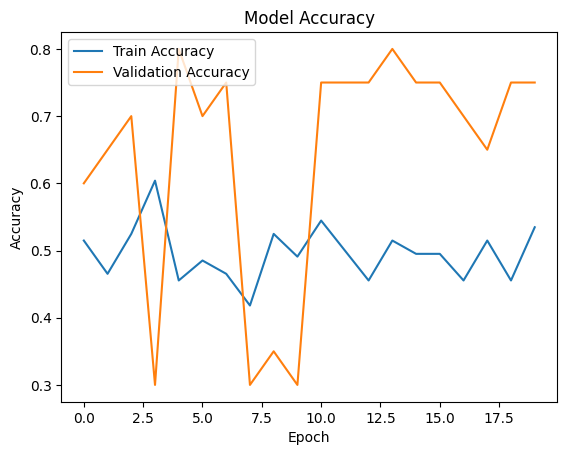

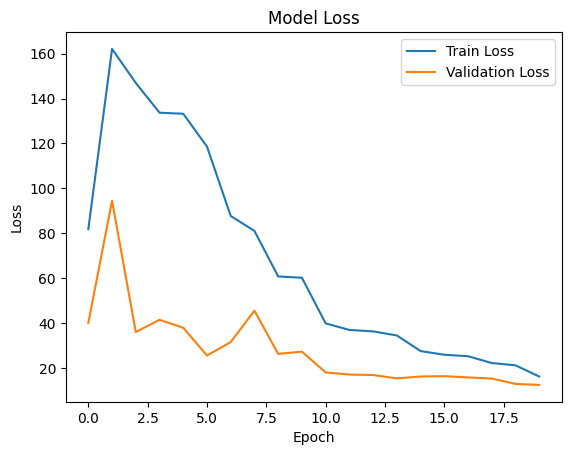

In [ ]:
import matplotlib.pyplot as plt

# Gráficas de precisión
plt.plot(modelb4.history['accuracy'], label='Train Accuracy')
plt.plot(modelb4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Gráficas de pérdida
plt.plot(modelb4.history['loss'], label='Train Loss')
plt.plot(modelb4.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

##Entrenamiento de modelo de DL (usando regularización y dropout) 3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Definir el modelo con ajuste en regularización y dropout
model5 = Sequential([
    Flatten(input_shape=(256, 256, 3)),  # Aplanar las imágenes de entrada

    # Primera capa oculta
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),

    # Segunda capa oculta
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),

    # Tercera capa oculta
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),

    # Capa de salida
    Dense(1, activation='sigmoid')
])

# Compilar el modelo con un learning rate ajustado
model5.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
modelb5 = model5.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30  # Aumentar el número de épocas para una mejor convergencia
)


Epoch 1/30
11/11 [==============================] - 44s 4s/step - loss: 5.6848 - accuracy: 0.6238 - val_loss: 4.8611 - val_accuracy: 0.7000
Epoch 2/30
11/11 [==============================] - 42s 4s/step - loss: 7.3183 - accuracy: 0.5743 - val_loss: 5.2410 - val_accuracy: 0.7000
Epoch 3/30
11/11 [==============================] - 38s 3s/step - loss: 11.7506 - accuracy: 0.5149 - val_loss: 2.9316 - val_accuracy: 0.6500
Epoch 4/30
11/11 [==============================] - 37s 3s/step - loss: 7.9670 - accuracy: 0.5644 - val_loss: 1.6384 - val_accuracy: 0.5000
Epoch 5/30
11/11 [==============================] - 39s 4s/step - loss: 11.9619 - accuracy: 0.4554 - val_loss: 1.3058 - val_accuracy: 0.6500
Epoch 6/30
11/11 [==============================] - 38s 3s/step - loss: 8.2101 - accuracy: 0.4455 - val_loss: 1.4493 - val_accuracy: 0.7500
Epoch 7/30
11/11 [==============================] - 37s 3s/step - loss: 9.0492 - accuracy: 0.5149 - val_loss: 1.6683 - val_accuracy: 0.5500
Epoch 8/30
11/11 [

##Evauación de resultados (usando regularización y dropout) 3

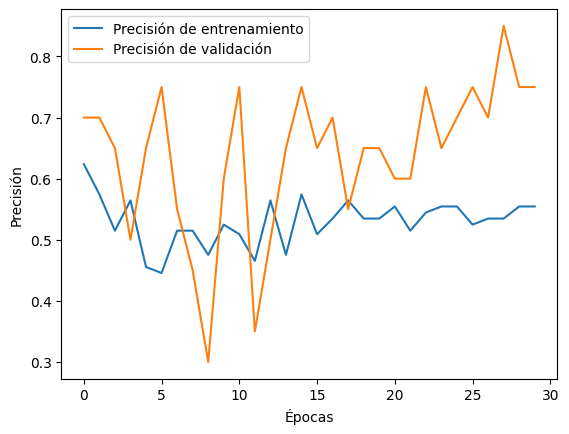

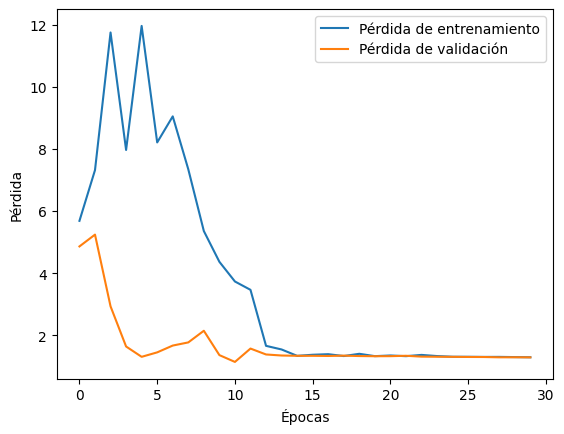

In [ ]:
# Graficar la precisión
plt.plot(modelb5.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(modelb5.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(modelb5.history['loss'], label='Pérdida de entrenamiento')
plt.plot(modelb5.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


##Entrenamiento de modelo de DL (agregando una capa oculta adicional)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Definir el modelo con ajuste en regularización y dropout
model6 = Sequential([
    Flatten(input_shape=(256, 256, 3)),  # Aplanar las imágenes de entrada

    # Primera capa oculta
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    # Segunda capa oculta
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    # Tercera capa oculta
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    # Cuarta capa oculta
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    # Capa de salida
    Dense(1, activation='sigmoid')
])

# Compilar el modelo con un learning rate ajustado
model6.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
modelb6 = model6.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)


Epoch 1/20
11/11 [==============================] - 71s 6s/step - loss: 2.7382 - accuracy: 0.5149 - val_loss: 3.0974 - val_accuracy: 0.5000
Epoch 2/20
11/11 [==============================] - 61s 6s/step - loss: 2.4877 - accuracy: 0.4752 - val_loss: 2.4033 - val_accuracy: 0.4500
Epoch 3/20
11/11 [==============================] - 59s 5s/step - loss: 2.5861 - accuracy: 0.4950 - val_loss: 2.4394 - val_accuracy: 0.5500
Epoch 4/20
11/11 [==============================] - 62s 6s/step - loss: 2.4353 - accuracy: 0.5743 - val_loss: 2.2830 - val_accuracy: 0.5000
Epoch 5/20
11/11 [==============================] - 62s 6s/step - loss: 2.4672 - accuracy: 0.5743 - val_loss: 2.1499 - val_accuracy: 0.6500
Epoch 6/20
11/11 [==============================] - 60s 5s/step - loss: 2.6596 - accuracy: 0.3960 - val_loss: 2.3709 - val_accuracy: 0.6000
Epoch 7/20
11/11 [==============================] - 63s 6s/step - loss: 2.4713 - accuracy: 0.6040 - val_loss: 2.4043 - val_accuracy: 0.5000
Epoch 8/20
11/11 [==

##Evaluación de resultados (agregando una capa oculta adicional)

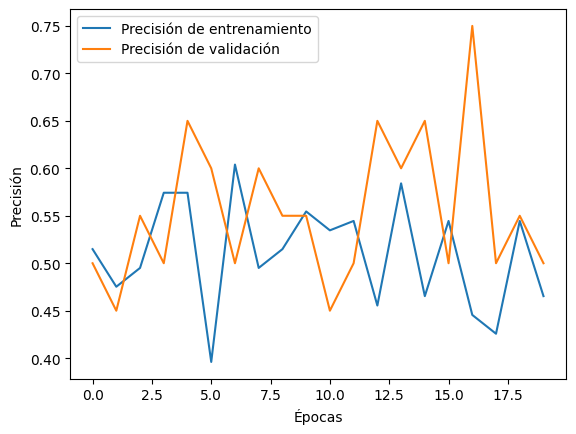

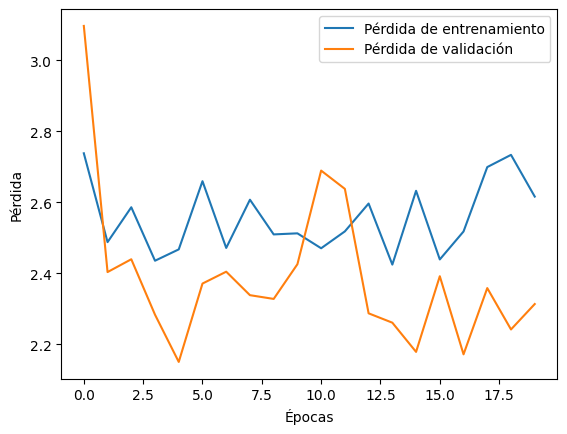

In [ ]:
# Graficar la precisión
plt.plot(modelb6.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(modelb6.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(modelb6.history['loss'], label='Pérdida de entrenamiento')
plt.plot(modelb6.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

##Discusión

En este challenge se buscó desarrollar un modelo de deep learning basado en redes neuronales multicapa para la clasificación binaria de radiografías de tórax, con el objetivo de detectar la presencia o ausencia de tuberculosis (TB).

A continuación, se describen los diferentes modelos de deep learning desarrollados.

**Modelo sin regularización ni dropout**<br>
- Características del modelo<br>
Capas: 4 capas (3 ocultas y 1 de salida)<br>
Activaciones: ReLU para capas ocultas, Sigmoid para la capa de salida
Parámetros de compilación: Adam (learning rate=0.001), binary_crossentropy, accuracy

- Resultados en validación: <br>
Precisión inicial: 55.00%
Precisión final: 50.00%
Pérdida final: 0.7069

El modelo sin regularización ni dropout mostró una leve mejora en la precisión, pero su capacidad para generalizar fue limitada, evidenciada por la alta pérdida y la variabilidad en la precisión.

**Modelo con dropout**<br>
- Características del modelo:<br>
Capas: 5 capas (4 ocultas y 1 de salida)<br>
Activaciones: ReLU para capas ocultas, Sigmoid para la capa de salida<br>
Dropout: 0.5<br>
Parámetros de compilación: Adam (learning rate=0.001), binary_crossentropy, accuracy<br>

- Resultados en validación:<br>
Precisión inicial: 60.00%
Precisión final: 40.00%
Pérdida final: 0.8161

La adición de dropout no mejoró significativamente el rendimiento del modelo.

**Modelo con regularización y dropout** <br>
- Características del modelo:<br>
Capas: 4 capas (3 ocultas y 1 de salida)<br>
Activaciones: ReLU para capas ocultas, Sigmoid para la capa de salida<br>
Regularización: L2 (0.001)<br>
Dropout: 0.5<br>
Parámetros de compilación: Adam (learning rate=0.001), binary_crossentropy, accuracy
- Resultados en validación:<br>
Precisión inicial: 75.00%
Precisión final: 20.00%
Pérdida final: 4.6959

A pesar de la implementación de regularización y dropout, los resultados mostraron un alto nivel de pérdida, lo cual indica que todavía habían problemas con la optimización del modelo.

**Modelo con regularización y dropout 2** <br>
- Características del modelo:<br>
Capas: 4 capas (3 ocultas y 1 de salida)<br>
Activaciones: ReLU para capas ocultas, Sigmoid para la capa de salida<br>
Regularización: L2 (0.01)<br>
Dropout: 0.5<br>
Parámetros de compilación: Adam (learning rate=0.001), binary_crossentropy, accuracy<br>
- Resultados en validación:<br>
Precisión inicial: 60.00%
Precisión final: 75.00%
Pérdida final: 12.5080

Este ajuste logró mejorar la precisión, pero todavía con alta pérdida, por lo que no se mejoró el rendimiento.

**Modelo con regularización y dropout 3** <br>
- Características del modelo:<br>
Capas: 4 capas (3 ocultas y 1 de salida)<br>
Activaciones: ReLU para capas ocultas, Sigmoid para la capa de salida<br>
Regularización: L2 (0.001)<br>
Dropout: 0.5<br>
Parámetros de compilación: Adam (learning rate=0.0001), binary_crossentropy, accuracy<br>
- Resultados en validación:<br>
Precisión inicial: 70.00%
Precisión final: 75.00%
Pérdida final: 1.2882

En comparación con los anteirores modelos, este presentó los mejores resultados, con una precisión final de 75.00% y una pérdida de 1.2882 en el conjunto de validación. Sin embargo, la precisión y la pérdida siguen siendo subóptimos. Por eso, se procede a intentar implementar una capa oculta adicional.

**Modelo con capa oculta adicional** <br>
- Características del modelo:<br>
Capas: 5 capas (4 ocultas y 1 de salida)<br>
Activaciones: ReLU para capas ocultas, Sigmoid para la capa de salida<br>
Regularización: L2 (0.001)<br>
Dropout: 0.5<br>
Parámetros de compilación: Adam (learning rate=0.0001), binary_crossentropy, accuracy<br>
- Resultados en validación:<br>
Precisión inicial: 50.00%
Precisión final: 50.00%
Pérdida final: 2.3131

Al agregar una capa adicional al modelo inicial, no se observaron mejoras en los resultados.

Aunque los modelos desarrollados lograron cierto nivel de precisión, especialmente, **el modelo con regularización y dropout 3**, se podrían realizar mejoras significativas si se emplean otras estrategias. Estas estrategias para mejorar valores de precisión y disminuir la pérdida, podrían ser 1) data augmentation (ya sea rotaciones, traslaciones, escalado, flip) para aumentar la cantidad de data disponible; 2) redes neuronales convolucionales (CNNs), ya que estos son más adecuados para la clasificación de imágenes debido a su capacidad para extraer características espaciales y patrones locales, lo cual a su vez se podrían utilizar arquitecturas como ResNet o Unet; 3) optimizar hiperparámetros según sea conveniente, ya sea la tasa de aprendizaje, el nro de neuronas en las capas ocultas y el factor de regularización.

##Conclusiones

En este challenge, se evaluaron modelos de deep learning con redes neuronales multicapa para la clasificación binaria de radiografías de tórax en la detección de tuberculosis (TB). A pesar de emplear diferentes configuraciones con dropout y regularización, los resultados en entrenamiento ni en validación fueron óptimos. El mejor modelo (con regularización y dropout 3) alcanzó una precisión del 75.00% y una pérdida de 1.2882 en el conjunto de validación.

Asimismo, en general estos resultados indican la necesidad de explorar otras técnicas o estrategias, como el aumento de datos, el uso de redes neuronales convolucionales, etc. , para mejorar la precisión y la generalización del modelo.